In [85]:
from model_mining.CreateDataSets import *
import matplotlib.pyplot as plt
import seaborn as sns
from model_mining.VisualizeDatasets import visualize_fits
from model_mining.QualityFunctions import *
from model_mining.utils import *
sns.set(rc={'figure.figsize':(10,10)})

There were 2 selectors obtained
There were 2 selectors obtained


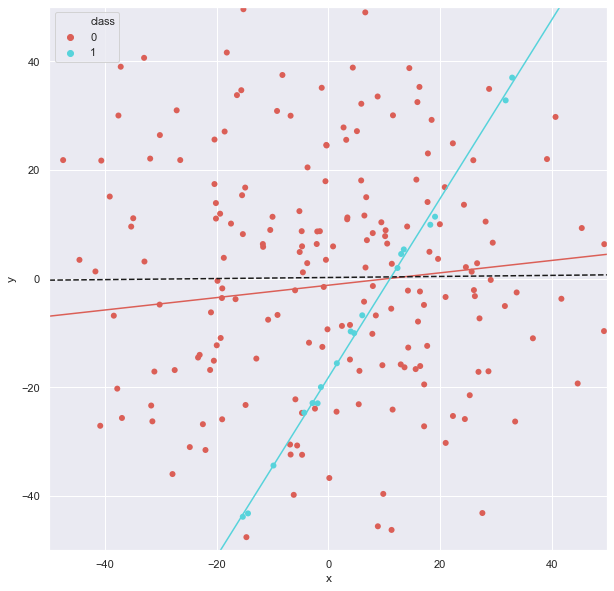

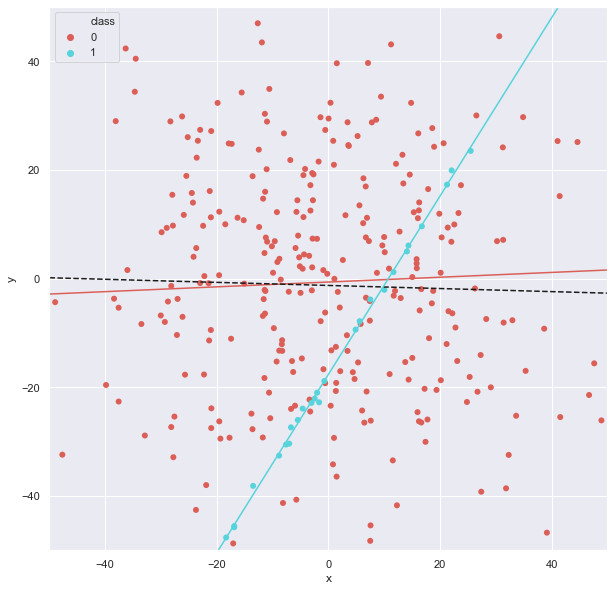

In [86]:
df1,df2,_,_,_=generate_two_regression_dataframes([200,300],1,1)
visualize_fits(*doFitsForDataFrame(df1))
plt.figure()
visualize_fits(*doFitsForDataFrame(df2))

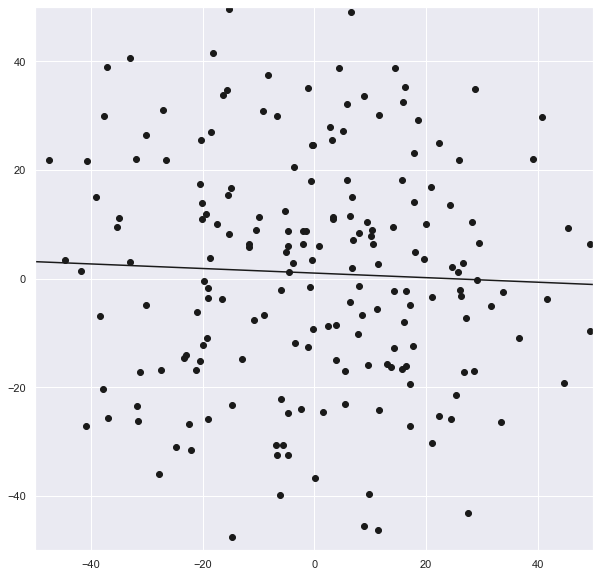

In [87]:
df1_0 = df1[df1['class']==0]
df1_1 = df1[df1['class']==1]
plt.scatter(df1_0["x"],df1_0['y'],label='background',color='k')
beta=np.polyfit(df1_0["x"],df1_0['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='k')
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.savefig('E:/Masterarbeit/background.png',dpi=300)

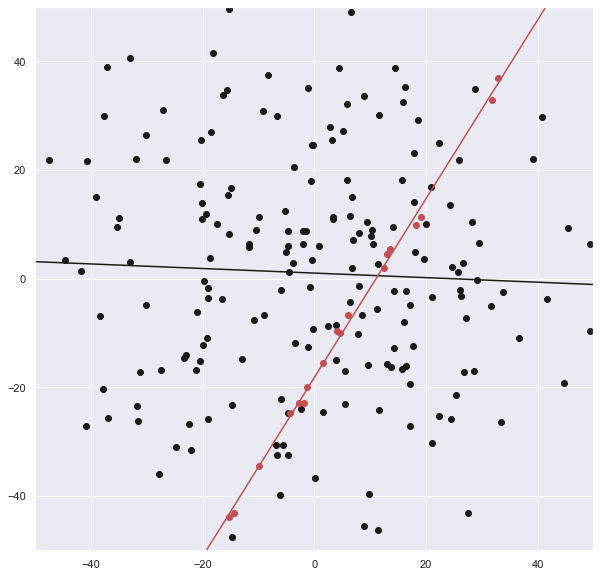

In [88]:
plt.scatter(df1_0["x"],df1_0['y'],label='background',color='k')
plt.scatter(df1_1["x"],df1_1['y'],label='background',color='r')
beta=np.polyfit(df1_0["x"],df1_0['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='k')

beta=np.polyfit(df1_1["x"],df1_1['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='r')
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.savefig('E:/Masterarbeit/background-model.png',dpi=300)

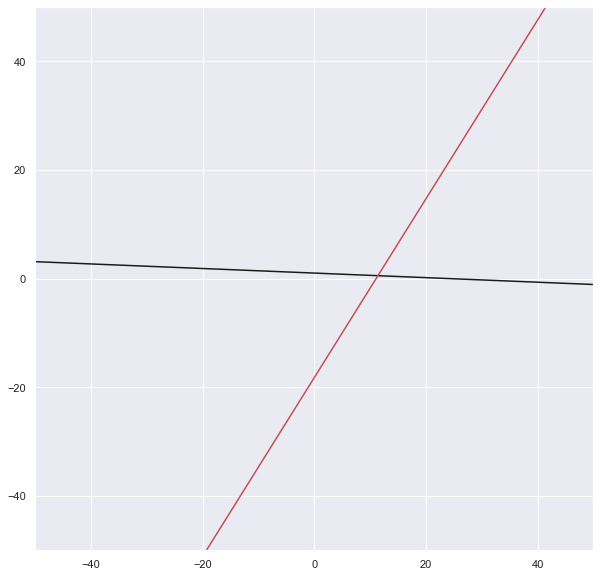

In [94]:
#plt.scatterd(0,df1_0['y'],label='background',color='k')
#plt.scatter(df1_1["x"],df1_1['y'],label='background',color='r')
beta=np.polyfit(df1_0["x"],df1_0['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='k')

beta=np.polyfit(df1_1["x"],df1_1['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='r')
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.savefig('E:/Masterarbeit/parameters.png',dpi=300)

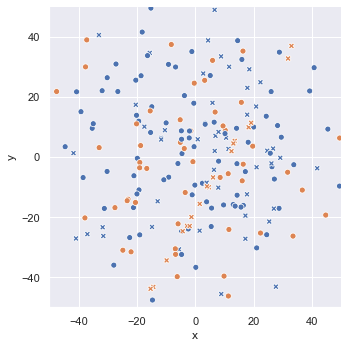

In [92]:
df1_hide=hide(df1,2,100)
sns.relplot(x='x',y='y',hue='class_1_0',style='class_1_1',data=df1_hide, 
                  legend=False);
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.savefig('E:/Masterarbeit/background-hidden.png',dpi=300)

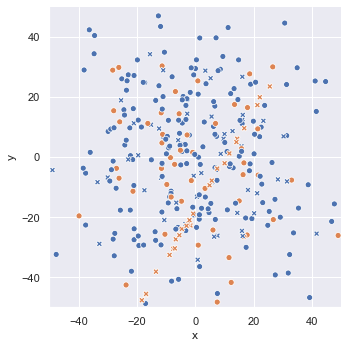

In [93]:
df2_hide=hide(df2,2,100)
sns.relplot(x='x',y='y',hue='class_1_0',style='class_1_1',data=df2_hide, 
                  legend=False);
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.savefig('E:/Masterarbeit/background-hidden2.png',dpi=300)

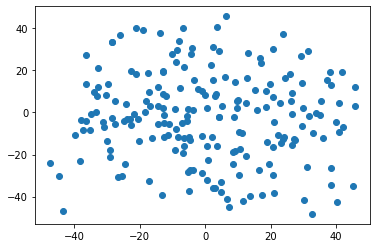

In [29]:
plt.scatter(df1["x"],df1['y'])

In [30]:
df1.columns

Index(['class', 'x', 'y', 'Noise_0'], dtype='object')

In [5]:
np.count_nonzero(df1['Noise_0'])

63

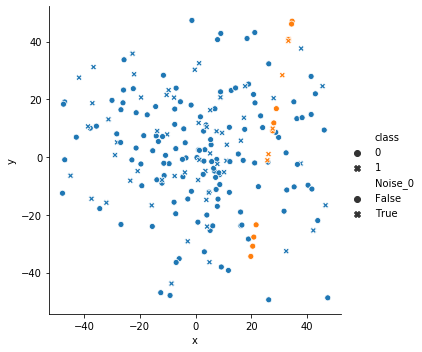

In [6]:
sns.relplot(x='x',y='y',hue='class',style='Noise_0',data=df1)

In [7]:
df1.columns

Index(['class', 'x', 'y', 'Noise_0'], dtype='object')

In [21]:
df1_hide=hide(df1,2,100)
d={0:'red',1:'green',2:'blue'}#,3:'blue'}
df1_hide['attr1']=(df1_hide['class_1_0'].astype(int)+(1-df1_hide['class_1_0'])*2*df1_hide['Noise_0'].astype(int)).apply(d.get)


In [75]:
sns.set(rc={'figure.figsize':(15,10)})

<Figure size 1080x720 with 0 Axes>

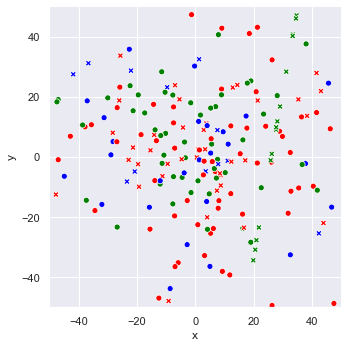

<Figure size 1080x720 with 0 Axes>

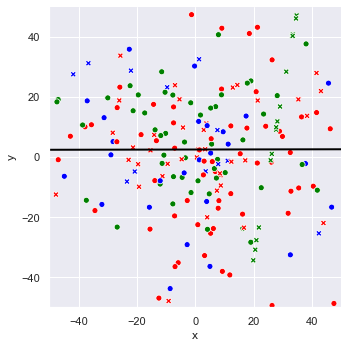

<Figure size 1080x720 with 0 Axes>

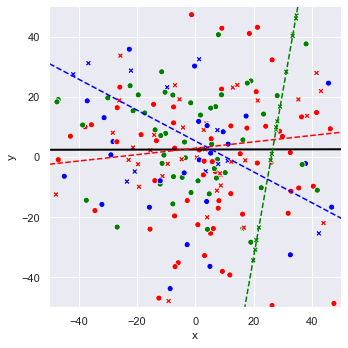

<Figure size 1080x720 with 0 Axes>

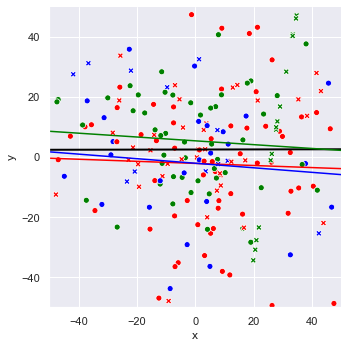

<Figure size 1080x720 with 0 Axes>

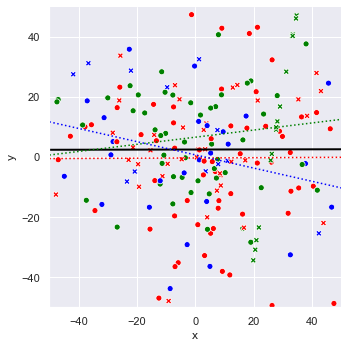

<Figure size 1080x720 with 0 Axes>

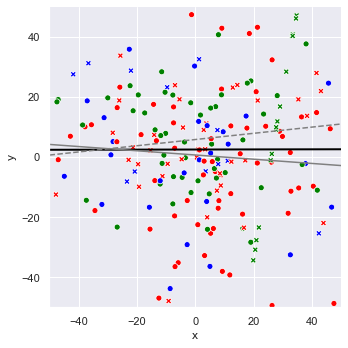

<Figure size 1080x720 with 0 Axes>

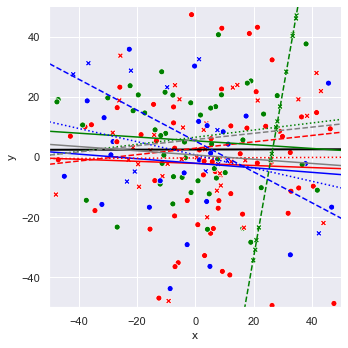

In [80]:
from itertools import product
name1='attr1'
name2='class_1_1'
df=df1_hide
def plot_df_hide(df,name1,name2,plot_type,path, normal = True):
    df['attr2']=df[name2]
    if not normal:
        df['attr2']=np.logical_not(df[name2])
    
    name2='attr2'
    df[name2+'inv']=np.logical_not(df[name2]).astype(int)
    sns.set()
    fig = plt.figure()
    l=[]
    for val in df[name1]:
        if not val in l:
            l.append(val)
        if len(l)==3:
            break
    current_palette = sns.color_palette(l)
    #ax = fig.add_subplot(1, 1, 1)
    if not normal:
            g=sns.relplot(x='x',y='y',hue=name1,style=name2,data=df,palette=current_palette, 
                  legend=False, markers=['s','^'])
    else:
        g=sns.relplot(x='x',y='y',hue=name1,style=name2,data=df,palette=current_palette, 
                  legend=False)
    beta=np.polyfit(df['x'],df['y'],1)
    x=np.linspace(-50,50)
    y=np.polyval(beta,x)
    if (1 & plot_type):
        plt.plot(x,y,color='black',linewidth=2)
    
    display_types = []
    if (2 & plot_type):
        display_types.append((True,'--'))
    if (4 & plot_type):
        display_types.append((False,'-'))
    for prop1, (prop2,style) in product(list(d.values()),display_types):
        sel=np.logical_and(df[name1]==prop1, df[name2]==prop2)
        df_tmp=df[sel]
        if len(df_tmp)>0:
            beta=np.polyfit(df_tmp['x'],df_tmp['y'],1)
            x=np.linspace(-50,50)
            y=np.polyval(beta,x)
            plt.plot(x,y,color=prop1,linestyle=style)
    if (8 & plot_type):
        for prop1 in list(d.values()):
            sel=df[name1]==prop1
            df_tmp=df[sel]
            if len(df_tmp)>0:
                beta=np.polyfit(df_tmp['x'],df_tmp['y'],1)
                x=np.linspace(-50,50)
                y=np.polyval(beta,x)
                plt.plot(x,y,color=prop1,linestyle=':')
    if (16 & plot_type):
        for prop2,style in [(True,'--'),(False,'-')]:
            sel=df[name2]==prop2
            df_tmp=df[sel]
            if len(df_tmp)>0:
                beta=np.polyfit(df_tmp['x'],df_tmp['y'],1)
                x=np.linspace(-50,50)
                y=np.polyval(beta,x)
                plt.plot(x,y,color='grey',linestyle=style)
    
    plt.xlim([-50,50])
    plt.ylim([-50,50])
    plt.savefig(path,dpi=300)
    #g.add_legend()
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #g._legend.set_background_alpha=1
    #g.legend_out=False
    #leg = g._legend
    #leg.background_color='white'
    #leg.alpha=1
    #leg.set_bbox_to_anchor([0.7,0.7])

d={0:'red',1:'green',2:'blue'}
#plot_df_hide(df1_hide,name1,name2,'E:/Masterarbeit/L.pdf')
for val in [0,1,3,5,9,17,31]:
    plot_df_hide(df1_hide,name1,name2,val,'E:/Masterarbeit/L'+str(val)+'.png',True)

<Figure size 1080x720 with 0 Axes>

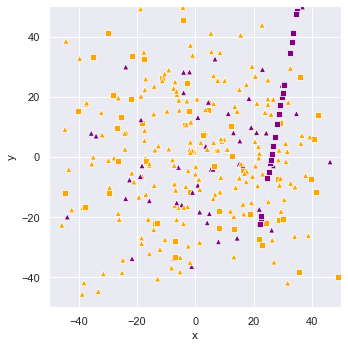

<Figure size 1080x720 with 0 Axes>

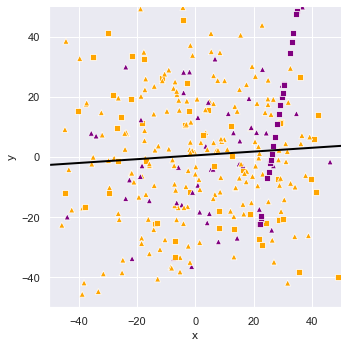

<Figure size 1080x720 with 0 Axes>

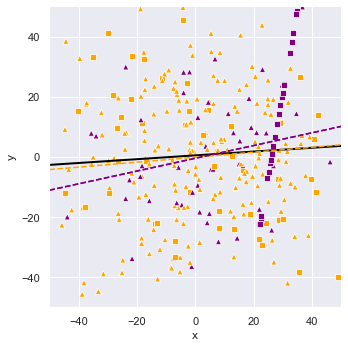

<Figure size 1080x720 with 0 Axes>

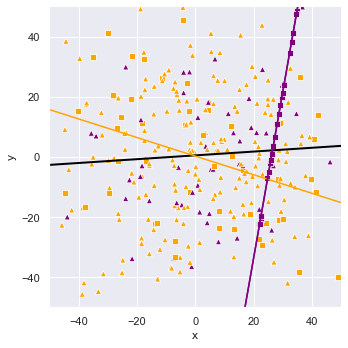

<Figure size 1080x720 with 0 Axes>

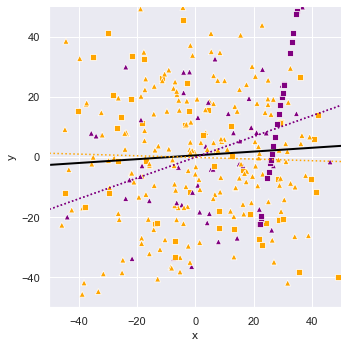

<Figure size 1080x720 with 0 Axes>

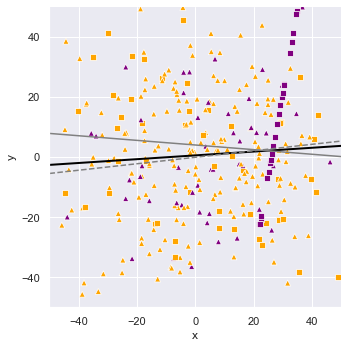

<Figure size 1080x720 with 0 Axes>

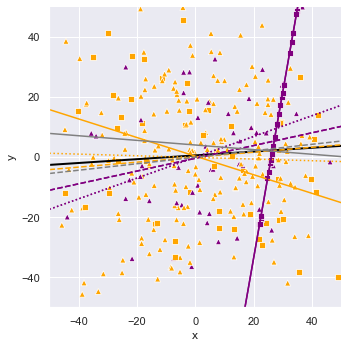

In [82]:
df2_hide=hide(df2,2,100)
d={0:'orange',1:'purple',2:'purple'}#,3:'blue'}
df2_hide['attr1']=(df2_hide['class_1_0'].astype(int)).apply(d.get)#+(1-df2_hide['class_1_0'])*2*df2_hide['Noise_0'].astype(int)).apply(d.get)
#plot_df_hide(df2_hide,name1,name2,'E:/Masterarbeit/R.pdf')
for val in [0,1,3,5,9,17,31]:
    plot_df_hide(df2_hide,name1,name2,val,'E:/Masterarbeit/R'+str(val)+'.png',False)

In [12]:
df

,class,x,y,Noise_0,class_1_0,class_1_1,attr1,attr2,attr2inv
0,0,42.312376,-25.389320,True,True,False,green,False,1
1,0,31.788281,-18.715806,False,False,False,red,False,1
2,0,41.533459,14.784053,False,False,False,red,False,1
3,0,12.153107,10.342379,False,False,False,red,False,1
4,0,12.147925,-12.189419,False,True,False,green,False,1
...,...,...,...,...,...,...,...,...,...
201,1,34.484805,46.102574,False,True,True,green,True,0
202,1,20.918718,-27.682751,False,True,True,green,True,0
203,1,27.689098,9.901046,True,True,True,green,True,0
204,1,25.796438,-1.100071,True,True,True,green,True,0


In [38]:
2&4

0

In [40]:
bool(3)

True